# Network infodemic model

Garland Culbreth

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import polars as pl
from tqdm import tqdm

In [32]:
from nim import model as nimodel
from nim import utils as niutils
plt.style.use("aeon")

## Specify options
---

In [33]:
tmax = 200
number_of_nodes = 40
init_neighbor_edge_weight = 0.1
init_non_neighbor_edge_weight = 0.001
reciprocate_interactions = True

## Initialize network and attitudes
---

In [34]:
G_social = nimodel.create_network(
    network_type="watts_strogatz",
    number_of_nodes=number_of_nodes
)

Initialize and view starting attitudes.

In [35]:
attitudes = nimodel.initialize_attitudes(
    number_of_nodes,
    distribution="normal",
    loc=0.0,
    scale=0.1
)

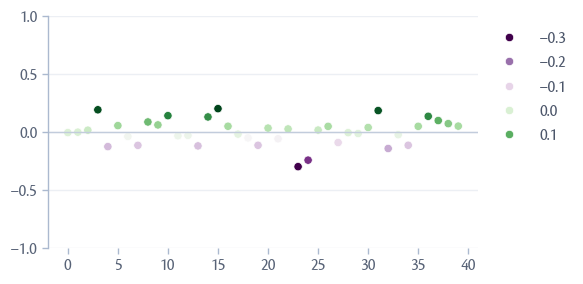

In [36]:
niutils.plot_initial_attitudes(attitudes, number_of_nodes)

Initialize interaction dynamics

In [37]:
A_social = nimodel.initialize_edges(
    G_social=G_social,
    neighbor_weight=init_neighbor_edge_weight,
    non_neighbor_weight=init_non_neighbor_edge_weight
)

## Run simulation
---

In [38]:
results = nimodel.run_model(
    tmax,
    number_of_nodes,
    A_social,
    attitudes,
    reciprocate_interactions
)
attitude_tracker = results[0]
sim_summary = results[1]

100%|██████████| 200/200 [00:01<00:00, 145.36it/s]


## Results
---

Plot all the node attitudes over time.

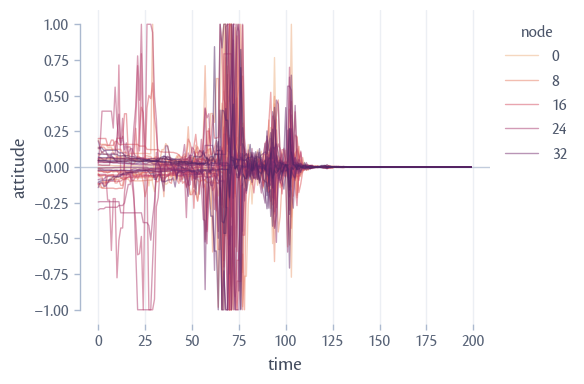

In [39]:
niutils.plot_attitude_evolution(attitude_tracker, tmax)

View the summary table.

In [40]:
sim_summary

time,edge_weight_mean,edge_weight_median,edge_weight_sd,attitude_mean,attitude_median,attitude_sd
i64,f64,f64,f64,f64,f64,f64
0,0.00595,0.001,0.021577,-0.000616,0.005431,0.108094
0,0.005999,0.001,0.022324,-0.001508,0.003641,0.107997
1,0.006254,0.001,0.025289,0.000219,0.001832,0.10651
2,0.006507,0.001,0.027542,0.005584,0.001832,0.121193
3,0.006572,0.001,0.028543,0.002249,0.001787,0.122433
4,0.006732,0.001,0.029666,0.003435,0.002361,0.120137
5,0.006979,0.001,0.032681,-0.001067,0.002361,0.12073
6,0.007064,0.001,0.033324,-0.00008,0.002361,0.119018
7,0.007352,0.001,0.036093,-0.004686,0.002569,0.14726
